<a href="https://colab.research.google.com/github/Henriquerezer/FLAI-Cursos/blob/main/Rafinha_dos_dados_cursos/Classifica%C3%A7%C3%A3o/Aula_import%C3%A2ncia_de_variaveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#bibliotecas padrão
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# código para permitir acesso ao meu google drive, assim poderei importar os dados, sem precisar fazer upload
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Dados

In [3]:
caminho = '/content/gdrive/MyDrive/Colab_Notebooks/FLAI/Rafinha dos dados/Classificação/Dados/feat_imp.csv'
dados = pd.read_csv(caminho)
dados

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1,1


# Separação em variaveis preditivas e variável resposta 

In [4]:
X = dados.drop('Exited', axis = 1)
y = dados['Exited']

#Divisão em conjunto treio e conjunto teste

Esses dados não tem uma coluna de TEMPO

Então faremos uma validação OUT-OF-SAMPLE

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

# Definição dos parâmentros de validação cruzada

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parametros = {
    'max_leaf_nodes': [4,8,16,32,64,128,256,512,1024],
    'criterion' : ['gini','entropy']
}

#objeto de gridsearch

grid = GridSearchCV(
    DecisionTreeClassifier(random_state = 42), #Primeiro argumento: Modelo
    parametros,                                # SEgundo argumento; Parâmetros
    cv = 10,                                   # Argumento CV: quantidade de Folds
    scoring = 'roc_auc',                       # Argumento scoring: Métrica (Métrica mais utilizada)
    verbose = 5,                               # Argumento "Verbose": mostra na tela
)

# Encontra melhor modelo nos dados de treino por validação cruzada

In [ ]:
grid.fit(X_train, y_train)

# Vamos ver no nosso CONJUNTO de teste 

In [10]:
y_pred = grid.predict_proba(X_test)
y_pred

array([[0.97566628, 0.02433372],
       [0.96140351, 0.03859649],
       [0.91447368, 0.08552632],
       ...,
       [0.76519916, 0.23480084],
       [0.97566628, 0.02433372],
       [0.75221239, 0.24778761]])

In [11]:
y_pred = y_pred[:,1]
y_pred

array([0.02433372, 0.03859649, 0.08552632, ..., 0.23480084, 0.02433372,
       0.24778761])

# VERIFICAR A IMPORTÂNCIA DE VARIAVEIS

In [12]:
grid.best_estimator_.feature_importances_

array([0.        , 0.40621811, 0.        , 0.13148075, 0.33033745,
       0.        , 0.08993142, 0.        , 0.        , 0.04203226,
       0.        , 0.        , 0.        ])

In [13]:
X_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [18]:
importancias = grid.best_estimator_.feature_importances_
ordem = np.argsort(importancias)[::-1 ]#[Isso inverte a ordem dos números]
colunas = X.columns

for col,imp in zip(colunas[ordem], importancias[ordem]):
  print(col,imp)

Age 0.406218114116893
NumOfProducts 0.3303374522057662
Balance 0.1314807519269129
IsActiveMember 0.08993141760599548
Geography_Germany 0.04203226414443237
Gender_Male 0.0
Gender_Female 0.0
Geography_Spain 0.0
Geography_France 0.0
EstimatedSalary 0.0
HasCrCard 0.0
Tenure 0.0
CreditScore 0.0


In [19]:
importancias = grid.best_estimator_.feature_importances_
ordem = np.argsort(importancias)[::-1 ]#[Isso inverte a ordem dos números]
colunas = X.columns

for col,imp in zip(colunas[ordem], importancias[ordem]):
  print(f'{col},{imp}')

Age,0.406218114116893
NumOfProducts,0.3303374522057662
Balance,0.1314807519269129
IsActiveMember,0.08993141760599548
Geography_Germany,0.04203226414443237
Gender_Male,0.0
Gender_Female,0.0
Geography_Spain,0.0
Geography_France,0.0
EstimatedSalary,0.0
HasCrCard,0.0
Tenure,0.0
CreditScore,0.0


In [21]:
importancias = grid.best_estimator_.feature_importances_
ordem = np.argsort(importancias)[::-1 ]#[Isso inverte a ordem dos números]
colunas = X.columns

for col,imp in zip(colunas[ordem], importancias[ordem]):
  print(f'{col:30s},{imp:.3f}')  # (30s -> significa que a string, vai ocupar 30 espaços, por isso melhgora a visualização)

Age                           ,0.406
NumOfProducts                 ,0.330
Balance                       ,0.131
IsActiveMember                ,0.090
Geography_Germany             ,0.042
Gender_Male                   ,0.000
Gender_Female                 ,0.000
Geography_Spain               ,0.000
Geography_France              ,0.000
EstimatedSalary               ,0.000
HasCrCard                     ,0.000
Tenure                        ,0.000
CreditScore                   ,0.000


# AJUDA NA ANÁLISE PRELIMINAR 

Mesmo que a árvore de decissão não seja nosso melhor modelo para os nossos dados, ela pode nos ajudar a entender a importância das variáveis dos nossos dados, facilitando o ajuste de outros modelos que se Adéquem melhor aos nossos dados. 

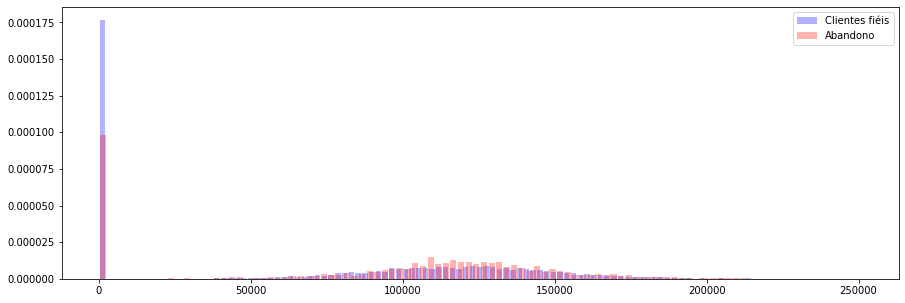

In [22]:
plt.figure(figsize=(15,5))
plt.hist(X.loc[y==0].Balance, rwidth= 0.8 ,bins = 100,color = 'b', alpha = 0.3, density = True, label = 'Clientes fiéis')
plt.hist(X.loc[y==1].Balance,rwidth= 0.8 , bins = 100,color = 'r', alpha = 0.3, density = True, label = 'Abandono')
plt.legend();

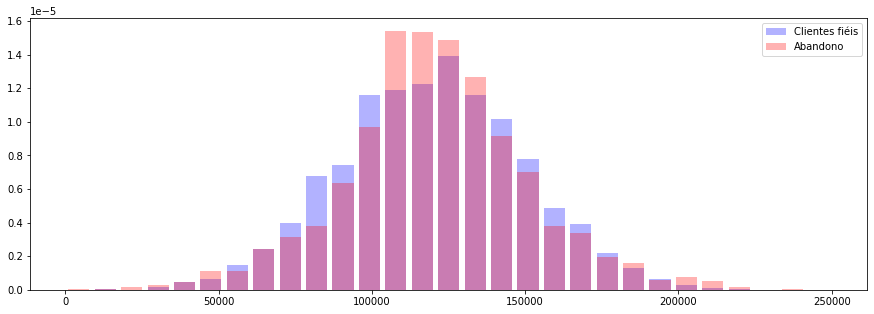

In [24]:
# ZOOM

plt.figure(figsize=(15,5))
plt.hist(X.loc[y==0].Balance, rwidth= 0.8 ,bins = np.linspace(100,250000,30),color = 'b', alpha = 0.3, density = True, label = 'Clientes fiéis')
plt.hist(X.loc[y==1].Balance,rwidth= 0.8 , bins = np.linspace(100,250000,30),color = 'r', alpha = 0.3, density = True, label = 'Abandono')
plt.legend();

# Podemos fazer um modelo melhor! ( Ou pelo menos mais simples)

In [ ]:
colunas_selecionadas = [
                        'Age',
                        'NumOfProducts',
                        'Balance',
                        'IsActiveMember',
                        'Geography_Germany',
                        'EstimatedSalary'
]

grid.fit(X_train[colunas_selecionadas], y_train)

antes tinha dado 0.8335928580825248

In [29]:
from sklearn.metrics import roc_auc_score
y_pred2 = grid.predict_proba(X_test[colunas_selecionadas])[:,1]

roc_auc_score(y_test, y_pred2)

0.8422155663158849

Além de diminuir o número de colunas, também houve uma melhora na métrica AUC (0.8422155663158849)